# Object Detection

## Try:
- **Train Faster R-CNN on the SportMoT**: 
  - The effect is not really good. The reason may be that we implement it by ourselves and there are some unseen bugs. The next step may be using other mature libraries (Detectron2) to train the model.
- **Yolov3 & Yolov8 on the SportMoT dataset**: 
  - Considering the computational complexity and the performance, Yolov8 might be a better choice. However, Yolo can only detect the “Person” object but it is hard for it to recognize the identity of the athlete. Therefore, another identifier is required to determine whether the object is the person we want to track.
- **Try Detectron2 to get the second object detection model**

# Plan for Next Step

## Initialize Deep SORT
- **Deep SORT requires the bounding box coordinates and associated feature vectors for each detected object**. You can extract feature vectors using a separate deep learning model (often a CNN trained for re-identification tasks).

## Track Objects Across Frames
- **Deep SORT uses these feature vectors along with the bounding box coordinates to track objects across frames**.
- It assigns a unique identifier to each tracked object, which remains consistent across frames as long as the object is being tracked.

## Extracting Central Points and Time Series Data
- **For each tracked object, you can calculate the central point of the bounding box**.
- Store these central points along with their unique identifiers and frame numbers to create a time series of object movements.


In [1]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

PATH = 'dataset/train/v_-6Os86HzwCs_c009/img1/'

PIC = PATH + '000001.jpg'

In [3]:
from deepsort.tracker import DeepSortTracker
from ultralytics import YOLO
import cv2
import glob

In [ ]:
image_paths = glob.glob(PATH + '*.jpg')

for image_path in image_paths:
    frame = cv2.imread(image_path)
    results = model(frame)
    


In [13]:
results = model(PIC)

for result in results:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs


image 1/1 g:\My Drive\US_used\DUKE\ECE685DL\Project\ECE685-CDV\dataset\train\v_-6Os86HzwCs_c009\img1\000001.jpg: 384x640 13 persons, 192.0ms
Speed: 2.0ms preprocess, 192.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
boxes, masks, keypoints, probs

(ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
 conf: tensor([0.8503, 0.8389, 0.8297, 0.7982, 0.7873, 0.7470, 0.7244, 0.7209, 0.7135, 0.7062, 0.5021, 0.3182, 0.2551], device='cuda:0')
 data: tensor([[1.0364e+03, 3.7078e+02, 1.0997e+03, 4.9169e+02, 8.5031e-01, 0.0000e+00],
         [4.5961e+02, 4.9646e+02, 5.1498e+02, 5.9427e+02, 8.3886e-01, 0.0000e+00],
         [2.9584e+02, 4.4958e+02, 3.8646e+02, 5.7867e+02, 8.2973e-01, 0.0000e+00],
         [1.0513e+02, 2.4759e+02, 1.4464e+02, 3.8256e+02, 7.9815e-01, 0.0000e+00],
         [2.2769e+02, 4.0341e+02, 3.0315e+02, 5.3294e+02, 7.8728e-01, 0.0000e+00],
         [8.6094e+02, 2.7767e+02, 8.8958e+02, 3.7341e+02, 7.4696e-01, 0.0000e+00],
         [3.8267e+02, 2.6870e+02, 4.3876e+02, 3.4803e+02, 7.2441e-01, 0.0000e+00],
         [9.5023e+02, 2.5390e+02, 9.7299e+02, 3.2932e+02, 7.2088e-01, 0.0000e+00],
         [1.1111e+03, 2.2882e+02, 1.1442e+03, 3.1

In [15]:
from PIL import Image

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()

[1036  370 1099  491]
[459 496 514 594]
[295 449 386 578]
[105 247 144 382]
[227 403 303 532]
[860 277 889 373]
[382 268 438 348]
[950 253 972 329]
[1111  228 1144  317]
[767 357 812 464]
[418 184 449 273]
[  0 178  27 216]
[1208  179 1241  224]


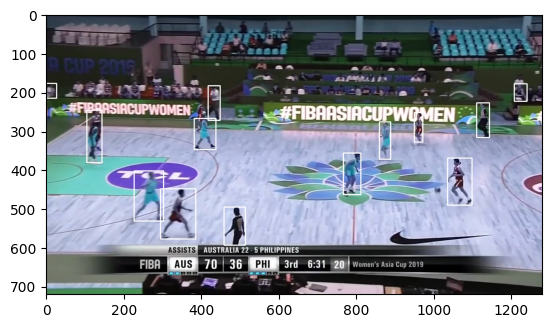

In [16]:
import cv2
import matplotlib.pyplot as plt

for result in results:                                          
    img = cv2.imread(PIC)                                      
    boxes = result.boxes.cpu().numpy()                         
    for box in boxes:                                          
        r = box.xyxy[0].astype(int)                            
        print(r)                                               
        cv2.rectangle(img, tuple(r[:2]), tuple(r[2:]), (255, 255, 255), 2)   

    # Display the image
    plt.imshow(img)                       # show img